# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress
import os
import csv
import random
import numpy as np
import requests
from pprint import pprint
from config import api_key

## Generate Cities List

In [2]:
### Generate a random Lat Long table to generate a cities list:  
latlist = []
longlist = []
for i in range(0,1500):
    latlist.append(float(random.randrange(-90, 90))*1.00249)
    longlist.append(float(random.randrange(-180, 180))*1.00249)

dict_with_lists = {"Latitude": latlist,
                   "Longitude": longlist}
RandomLatLong_df = pd.DataFrame(dict_with_lists)

# Make sure no lat long values above +/- 90 and +/- 180 respectively  
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Longitude"]>=-180)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Longitude"]<=180)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Latitude"]>=-90)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Latitude"]<=90)]

# View lat long dataframe
RandomLatLong_df


,Latitude,Longitude
0,74.18426,-7.01743
1,-43.10707,-72.17928
2,-3.00747,-58.14442
3,-89.22161,168.41832
4,-70.17430,-43.10707
...,...,...
1495,56.13944,-86.21414
1496,20.04980,-122.30378
1497,-67.16683,-97.24153
1498,-19.04731,76.18924


In [3]:
### Generate a random cities from Lat Long table make sure we have up to 500. Delete any duplicates: 
# Make lists needed
cityList = []
countryList = []

# Create a loop to find a city for each lat long pair
for index, row in RandomLatLong_df.iterrows():
#     print(f"Searching for nearest city to lat long {row['Latitude'], row['Longitude']}...")
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cityName = city.city_name
    cityCountry = city.country_code
    RandomLatLong_df.loc[index,"City_Name"] = cityName
    RandomLatLong_df.loc[index,"Country"] = cityCountry
    cityList.append(cityName)
    countryList.append(cityCountry)

### Trying to identify and remove any duplicate cities 
CleanLatLong_df = RandomLatLong_df.drop_duplicates(subset = ['City_Name'])
print(RandomLatLong_df["City_Name"].value_counts())
          
# Update my cities and country list and lat long lists
citySeries = CleanLatLong_df['City_Name']
countrySeries = CleanLatLong_df['Country']
LatSeries = CleanLatLong_df['Latitude']
LongSeries = CleanLatLong_df['Longitude']
cityList = citySeries.values.tolist()
countryList = countrySeries.values.tolist()
LatList = LatSeries.values.tolist()
LongList = LongSeries.values.tolist()

citySeries

rikitea            54
punta arenas       43
ushuaia            42
busselton          40
mataura            33
                   ..
samarai             1
rawson              1
puerto ayacucho     1
ko samui            1
tigzirt             1
Name: City_Name, Length: 611, dtype: int64


0             klaksvik
1              calbuco
2          itacoatiara
3                bluff
4              ushuaia
             ...      
1481    nova esperanca
1482         salekhard
1486       belaya gora
1490             aktau
1491        hervey bay
Name: City_Name, Length: 611, dtype: object

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "London"
# Build partial query URL
base_url = url + "q=" + city + "&units=" + units + "&appid=" + api_key

In [5]:
# set up lists to hold reponse info
tempsList = []
humidityList = []
cloudinessList = []
windspeedsList = []
DateList = []
defective_cities = []

# Loop through the list of cities and perform a request for data on each
for city in cityList:
    print(f"Searching for city weather data for {city}...Onward and forward") 
    weather_url = url + "q=" + city + "&units=" + units + "&appid=" + api_key
    response = requests.get(weather_url).json()
    try:
        tempsList.append(response['main']['temp_max'])
        humidityList.append(response['main']['humidity'])
        cloudinessList.append(response['clouds']['all'])
        windspeedsList.append(response['wind']['speed'])
        DateList.append(response['dt'])
    except:
        print(f"Oops, looks like this city: {city} gave us a problem. On to the next one")
        defective_cities.append(city)
        tempsList.append('NaN')
        humidityList.append('NaN')
        cloudinessList.append('NaN')
        windspeedsList.append('NaN')
        DateList.append('NaN')

defective_cities

Searching for city weather data for klaksvik...Onward and forward
Searching for city weather data for calbuco...Onward and forward
Searching for city weather data for itacoatiara...Onward and forward
Searching for city weather data for bluff...Onward and forward
Searching for city weather data for ushuaia...Onward and forward
Searching for city weather data for tuktoyaktuk...Onward and forward
Searching for city weather data for victoria...Onward and forward
Searching for city weather data for bethel...Onward and forward
Searching for city weather data for hilo...Onward and forward
Searching for city weather data for dzilam gonzalez...Onward and forward
Searching for city weather data for kaura namoda...Onward and forward
Searching for city weather data for avarua...Onward and forward
Searching for city weather data for roblin...Onward and forward
Searching for city weather data for ponta do sol...Onward and forward
Searching for city weather data for butaritari...Onward and forward
Se

['mys shmidta',
 'attawapiskat',
 'taolanaro',
 'belushya guba',
 'lolua',
 'karaul',
 'tabukiniberu',
 'amderma',
 'illoqqortoormiut',
 'umzimvubu',
 'artyk',
 'dubenskiy',
 'marcona',
 'samusu',
 'ambodifototra',
 'tsihombe',
 'barentsburg',
 'tumannyy',
 'nizhneyansk',
 'vaitupu',
 'tabiauea',
 'perakhora',
 'grand river south east',
 'inderborskiy',
 'kegayli',
 'ruatoria',
 'formoso do araguaia',
 'rungata',
 'sentyabrskiy',
 'saleaula',
 'maloshuyka',
 'barbar',
 'urozhayne',
 'burica',
 'turtkul']

In [6]:
#  Make sure I have >= 500 cities
print(f"Cities list : {len(cityList)}")
# print(f"Latitudes list : {len(latlist)}")
# print(f"Longitudes list : {len(longlist)}")

Cities list : 611


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
dict_with_lists2 = {"City": cityList, 
                    "Latitude": LatList, 
                    "Longitude": LongList, 
                    "Max_Temp": tempsList, 
                    "Humidity": humidityList, 
                    "Cloudiness": cloudinessList, 
                    "Wind_Speed": windspeedsList, 
                    "Country_Code": countryList, 
                    "Date": DateList}
weather_data_500 = pd.DataFrame(dict_with_lists2)
weather_data_500 = weather_data_500.dropna(how='any')
weather_data_500 = weather_data_500[~weather_data_500.Max_Temp.str.contains("NaN", na=False)]
weather_data_500.head(100)

#  Making sure I have >= 500 cities
print(weather_data_500["City"].value_counts())
weather_data_500

port lincoln    1
port alfred     1
broken hill     1
darnah          1
meulaboh        1
               ..
santa fe        1
pringsewu       1
tandil          1
erzin           1
tigzirt         1
Name: City, Length: 576, dtype: int64


,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country_Code,Date
0,klaksvik,74.18426,-7.01743,51.8,93,86,10.29,fo,1600398913
1,calbuco,-43.10707,-72.17928,44.6,93,90,2.24,cl,1600398678
2,itacoatiara,-3.00747,-58.14442,76.82,79,2,1.86,br,1600398736
3,bluff,-89.22161,168.41832,51.01,76,100,25.01,nz,1600398914
4,ushuaia,-70.17430,-43.10707,30.2,86,90,17.22,ar,1600398914
...,...,...,...,...,...,...,...,...,...
606,nova esperanca,-23.05727,-52.12948,69.94,92,93,1.63,br,1600399084
607,salekhard,65.16185,66.16434,44.26,86,100,12.12,ru,1600399084
608,belaya gora,67.16683,145.36105,46.26,88,100,15.03,ru,1600399084
609,aktau,50.12450,74.18426,48.2,61,18,11.18,kz,1600399085


In [8]:

# Create lists and dicts needed
Lat_City_Mean_List = []
Long_City_Mean_List = []
Temp_City_Mean_List = []
Hum_City_Mean_List = []
Cloud_City_Mean_List = []
Wind_City_Mean_List = []

# Populate the statistics list for the lat
Lat_City_Mean_List.append(len(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.mean(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.median(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.std(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.min(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.max(weather_data_500["Latitude"]))
quartiles = weather_data_500["Latitude"].quantile([.25,.5,.75])
quartiles
latQ1 = quartiles[0.25]
latQ2 = quartiles[0.50]
latQ3 = quartiles[0.75]
Lat_City_Mean_List.append(latQ1)
Lat_City_Mean_List.append(latQ2)
Lat_City_Mean_List.append(latQ3)

# Populate the statistics list for the long
Long_City_Mean_List.append(len(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.mean(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.median(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.std(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.min(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.max(weather_data_500["Longitude"]))
quartiles = weather_data_500["Longitude"].quantile([.25,.5,.75])
quartiles
lngQ1 = quartiles[0.25]
lngQ2 = quartiles[0.50]
lngQ3 = quartiles[0.75]
Long_City_Mean_List.append(lngQ1)
Long_City_Mean_List.append(lngQ2)
Long_City_Mean_List.append(lngQ3)

# Populate the statistics list for the temperatures
Temp_City_Mean_List.append(len(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.mean(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.median(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.std(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.min(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.max(weather_data_500["Max_Temp"]))
quartiles = weather_data_500["Max_Temp"].quantile([.25,.5,.75])
quartiles
tempQ1 = quartiles[0.25]
tempQ2 = quartiles[0.50]
tempQ3 = quartiles[0.75]
Temp_City_Mean_List.append(tempQ1)
Temp_City_Mean_List.append(tempQ2)
Temp_City_Mean_List.append(tempQ3)

# Populate the statistics list for the humidities
Hum_City_Mean_List.append(len(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.mean(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.median(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.std(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.min(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.max(weather_data_500["Humidity"]))
quartiles = weather_data_500["Humidity"].quantile([.25,.5,.75])
quartiles
humQ1 = quartiles[0.25]
humQ2 = quartiles[0.50]
humQ3 = quartiles[0.75]
Hum_City_Mean_List.append(humQ1)
Hum_City_Mean_List.append(humQ2)
Hum_City_Mean_List.append(humQ3)

# Populate the statistics list for the cloudiness
Cloud_City_Mean_List.append(len(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.mean(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.median(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.std(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.min(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.max(weather_data_500["Cloudiness"]))
quartiles = weather_data_500["Cloudiness"].quantile([.25,.5,.75])
quartiles
cldQ1 = quartiles[0.25]
cldQ2 = quartiles[0.50]
cldQ3 = quartiles[0.75]
Cloud_City_Mean_List.append(cldQ1)
Cloud_City_Mean_List.append(cldQ2)
Cloud_City_Mean_List.append(cldQ3)

# Populate the statistics list for the wind speed
Wind_City_Mean_List.append(len(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.mean(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.median(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.std(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.min(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.max(weather_data_500["Wind_Speed"]))
quartiles = weather_data_500["Wind_Speed"].quantile([.25,.5,.75])
quartiles
wspdQ1 = quartiles[0.25]
wspdQ2 = quartiles[0.50]
wspdQ3 = quartiles[0.75]
Wind_City_Mean_List.append(wspdQ1)
Wind_City_Mean_List.append(wspdQ2)
Wind_City_Mean_List.append(wspdQ3)

IndexList = ['Count', 'Mean', 'Median', 'std', 'min', 'max', '25%', '50%', '75%']
# Create and display a summary stats dataframe from calculate values
summary_stats_dict= {"index": IndexList, "Latitude": Lat_City_Mean_List, "Longitude": Long_City_Mean_List, "Max_Temp": Temp_City_Mean_List, 
                     "Humidity": Hum_City_Mean_List, "Cloudiness": Cloud_City_Mean_List, "Wind_Speed": Wind_City_Mean_List}

summary_stats_df = pd.DataFrame(summary_stats_dict)
summary_stats_df

,index,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
1,Mean,17.550537,21.553535,65.743247,71.814236,49.447917,8.142326
2,Median,20.049800,29.072210,66.760000,77.000000,56.000000,6.930000
3,std,36.597941,90.119517,14.960943,19.760946,40.102829,5.992703
4,min,-89.221610,-179.445710,19.240000,3.000000,0.000000,0.220000
5,max,89.221610,178.443220,95.110000,100.000000,100.000000,43.730000
6,25%,-7.017430,-56.139440,54.787500,62.000000,3.750000,3.462500
7,50%,20.049800,29.072210,66.760000,77.000000,56.000000,6.930000
8,75%,46.114540,96.489663,78.265000,86.000000,90.000000,11.395000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
# To remove cities with Humidity > 100%
print(f"Minimum humidity value: {weather_data_500['Humidity'].min()}")
print(f"Maximum humidity value: {weather_data_500['Humidity'].max()}")
# weather_data_500_hum100 = weather_data_500[weather_data_500.Humidity<=100]
# weather_data_500_hum100['Humidity'].max()

Minimum humidity value: 3
Maximum humidity value: 100


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
humIQR = humQ3 - humQ1
humlower_bound = humQ1 - (1.5*humIQR)
humupper_bound = humQ3 + (1.5*humIQR)
clean_city_data_df = weather_data_500.loc[(weather_data_500["Humidity"]>= humlower_bound) & (weather_data_500["Humidity"]<= humupper_bound)]

# QC statements
print(f"Inter Quartile Range is: {humIQR}")
print(f"Lower bound is: {humlower_bound}")
print(f"Upper bound is: {humupper_bound}")
print(f"Minimum humidity value of clean city data: {clean_city_data_df['Humidity'].min()}")
print(f"Maximum humidity value of clean city data: {clean_city_data_df['Humidity'].max()}")
clean_city_data_df

Inter Quartile Range is: 24.0
Lower bound is: 26.0
Upper bound is: 122.0
Minimum humidity value of clean city data: 26
Maximum humidity value of clean city data: 100


,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country_Code,Date
0,klaksvik,74.18426,-7.01743,51.8,93,86,10.29,fo,1600398913
1,calbuco,-43.10707,-72.17928,44.6,93,90,2.24,cl,1600398678
2,itacoatiara,-3.00747,-58.14442,76.82,79,2,1.86,br,1600398736
3,bluff,-89.22161,168.41832,51.01,76,100,25.01,nz,1600398914
4,ushuaia,-70.17430,-43.10707,30.2,86,90,17.22,ar,1600398914
...,...,...,...,...,...,...,...,...,...
606,nova esperanca,-23.05727,-52.12948,69.94,92,93,1.63,br,1600399084
607,salekhard,65.16185,66.16434,44.26,86,100,12.12,ru,1600399084
608,belaya gora,67.16683,145.36105,46.26,88,100,15.03,ru,1600399084
609,aktau,50.12450,74.18426,48.2,61,18,11.18,kz,1600399085


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

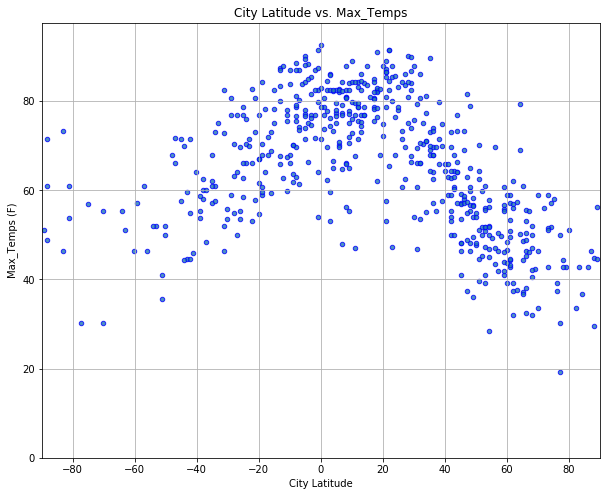

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a series for the needed columns from dataframe
ScatPlot_MaxTemps = clean_city_data_df['Max_Temp']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_MaxTemps.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Max_Temp": List_a,
           "Latitude": List_b}
LatTemp_ScatPlot_df = pd.DataFrame(Listsab)
LatTemp_ScatPlot_df

# Create plot
LatTemp_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Max_Temp", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Max_Temps")
plt.xlabel("City Latitude")
plt.ylabel("Max_Temps (F)")
plt.xlim(-90, 90)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Temps.png"))
plt.show()
plt.tight_layout()

## Latitude vs. Humidity Plot

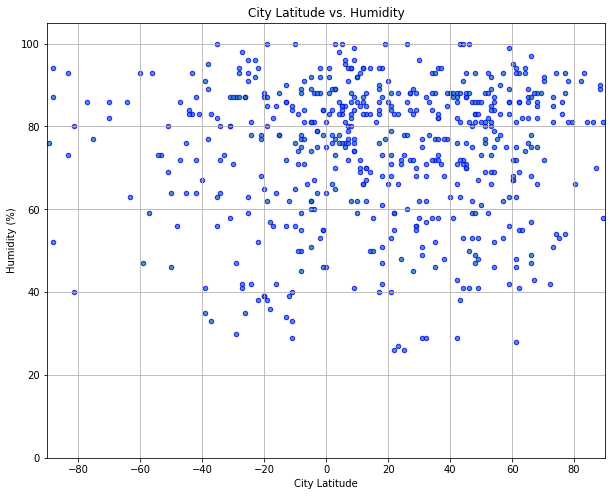

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a series for the needed columns from dataframe
ScatPlot_Hum = clean_city_data_df['Humidity']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Hum.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Humidity": List_a,
           "Latitude": List_b}
LatHum_ScatPlot_df = pd.DataFrame(Listsab)
LatHum_ScatPlot_df

# Create plot
LatHum_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Humidity", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(0, 105)
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity.png"))
plt.show()
plt.tight_layout()

## Latitude vs. Cloudiness Plot

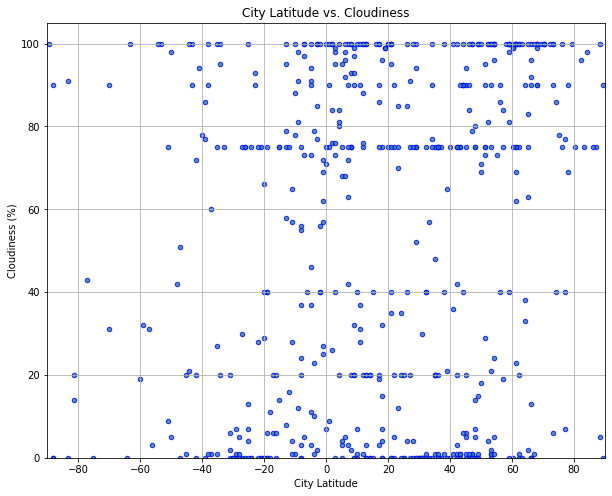

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a series for the needed columns from dataframe
ScatPlot_Cloud = clean_city_data_df['Cloudiness']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Cloud.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Cloudiness": List_a,
           "Latitude": List_b}
LatCloud_ScatPlot_df = pd.DataFrame(Listsab)
LatCloud_ScatPlot_df

# Create plot
LatCloud_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Cloudiness", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(0, 105)
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness.png"))
plt.show()
plt.tight_layout()

## Latitude vs. Wind Speed Plot

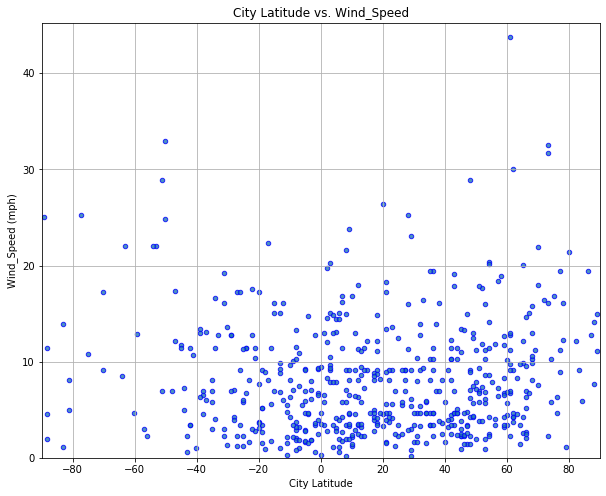

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a series for the needed columns from dataframe
ScatPlot_Wind_Speed = clean_city_data_df['Wind_Speed']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Wind_Speed.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Wind_Speed": List_a,
           "Latitude": List_b}
LatWind_Speed_ScatPlot_df = pd.DataFrame(Listsab)
LatWind_Speed_ScatPlot_df
LatWind_Speed_ScatPlot_df['Wind_Speed'].max()

# Create plot
LatWind_Speed_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Wind_Speed", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Wind_Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.xlim(-90, 90)
plt.ylim(0,(LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+1.5))
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Windspeed.png"))
plt.show()
plt.tight_layout()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The count for cities in the Northern Hemisphere is: 381
The correlation coefficient (r) is -0.7711
The p-value is 2.5492402561362785e-76
The r-value is: 0.5947


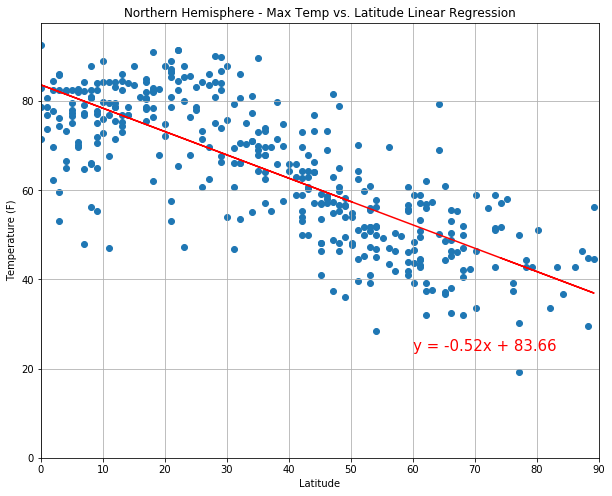

<Figure size 432x288 with 0 Axes>

In [27]:
# dataframe from scatter plot
LatTemp_ScatPlot_df
NorthHem_LatTemp_ScatPlot_df = LatTemp_ScatPlot_df[LatTemp_ScatPlot_df.Latitude>=0]
print(f"The count for cities in the Northern Hemisphere is: {NorthHem_LatTemp_ScatPlot_df['Latitude'].count()}")

#  CORRELATION COEFFICIENT
MaxTemp = NorthHem_LatTemp_ScatPlot_df['Max_Temp']
Latitude = NorthHem_LatTemp_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, MaxTemp)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, MaxTemp)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, MaxTemp)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,24), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(0, 90)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_MaxTemp_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The count for cities in the Southern Hemisphere is: 177
The correlation coefficient (r) is 0.6492
The p-value is 0.0
The r-value is: 0.4215


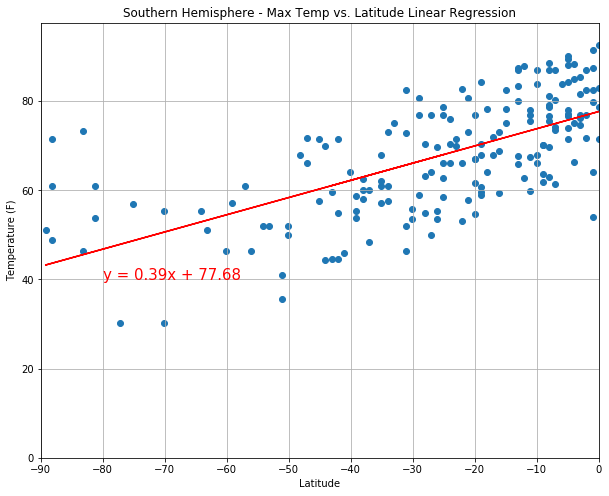

<Figure size 432x288 with 0 Axes>

In [26]:
# dataframe from scatter plot
LatTemp_ScatPlot_df
SouthHem_LatTemp_ScatPlot_df = LatTemp_ScatPlot_df[LatTemp_ScatPlot_df.Latitude<=0]
print(f"The count for cities in the Southern Hemisphere is: {SouthHem_LatTemp_ScatPlot_df['Latitude'].count()}")

#  CORRELATION COEFFICIENT
MaxTemp = SouthHem_LatTemp_ScatPlot_df['Max_Temp']
Latitude = SouthHem_LatTemp_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, MaxTemp)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],20)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, MaxTemp)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, MaxTemp)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(-90, 0)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_MaxTemp_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

### Observations from Max_Temp vs. Latitude (Northern and Southern Hemisphere)
 - There is a strong trend in both the Northern and southern hemisphere data (Stronger with the Northern hemisphere data). R-value of 0.59 for Northern Hemisphere and 0.42 for Southern hemisphere . Temperature drop as you get further away from the equator.
 - The max temperature data shows the best correlation with latitude of all the datasets. Showing a correlation coefficient of -0.77 for the Northern Hemisphere data and 0.65 for the Southern Hemisphere data.
 - Many more data points (cities) in the Northern hemisphere (364 cities) and Southern hemisphere (187 cities). This observation is the true for every plot pair and so will not be repeated each time.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.0498
The p-value is 0.3324624742278247
The r-value is: 0.0025


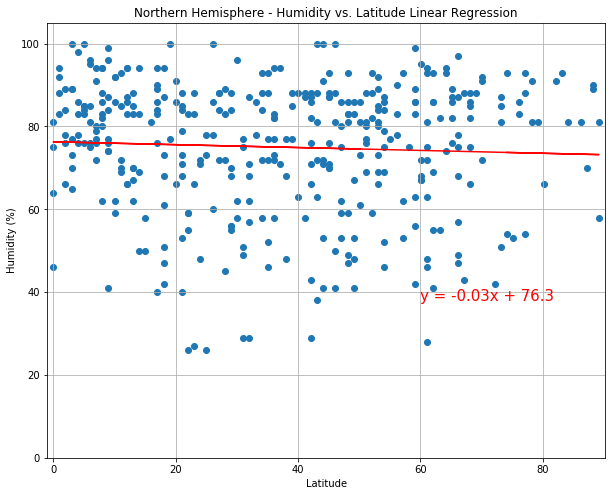

<Figure size 432x288 with 0 Axes>

In [17]:
# dataframe from scatter plot
LatHum_ScatPlot_df
NorthHem_LatHum_ScatPlot_df = LatHum_ScatPlot_df[LatHum_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Humidity = NorthHem_LatHum_ScatPlot_df['Humidity']
Latitude = NorthHem_LatHum_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Humidity)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {round(correlation[1],20)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Humidity)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,38), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim((NorthHem_LatHum_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatHum_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (LatHum_ScatPlot_df['Humidity'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.0826
The p-value is 0.27438551177073733
The r-value is: 0.0068


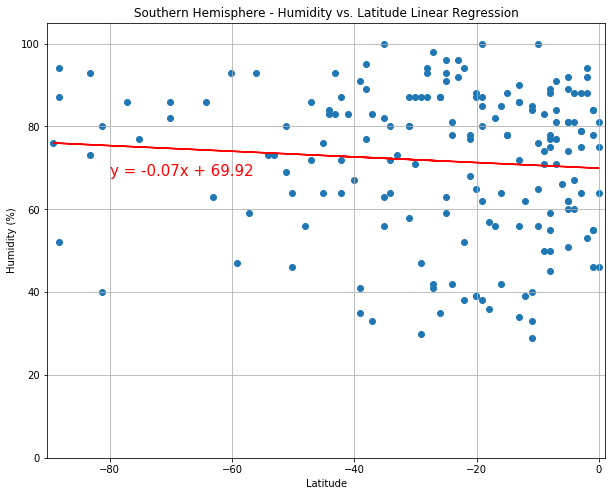

<Figure size 432x288 with 0 Axes>

In [25]:
# dataframe from scatter plot
LatHum_ScatPlot_df
SouthHem_LatHum_ScatPlot_df = LatHum_ScatPlot_df[LatHum_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Humidity = SouthHem_LatHum_ScatPlot_df['Humidity']
Latitude = SouthHem_LatHum_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Humidity)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Humidity)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,68), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim((SouthHem_LatHum_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatHum_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (LatHum_ScatPlot_df['Humidity'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

### Observations from Humidity vs. Latitude (Northern and Southern Hemisphere)
 - There is no discernable trend with the data in the Northern or Southern hemisphere data . R-value of 0.002 for Northern Hemisphere and 0.007 for Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.1075
The p-value is 0.036009135480465936
The r-value is: 0.0115


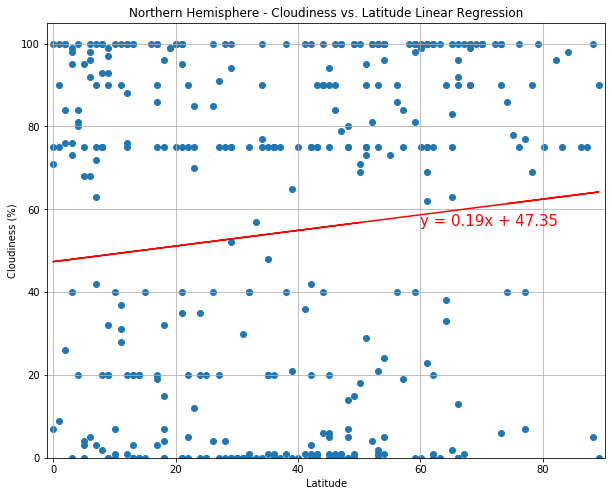

<Figure size 432x288 with 0 Axes>

In [24]:
# dataframe from scatter plot
LatCloud_ScatPlot_df
NorthHem_LatCloud_ScatPlot_df = LatCloud_ScatPlot_df[LatCloud_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Cloud = NorthHem_LatCloud_ScatPlot_df['Cloudiness']
Latitude = NorthHem_LatCloud_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Cloud)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Cloud)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Cloud)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,56), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim((NorthHem_LatCloud_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatCloud_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (NorthHem_LatCloud_ScatPlot_df['Cloudiness'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.082
The p-value is 0.2781034394909937
The r-value is: 0.0067


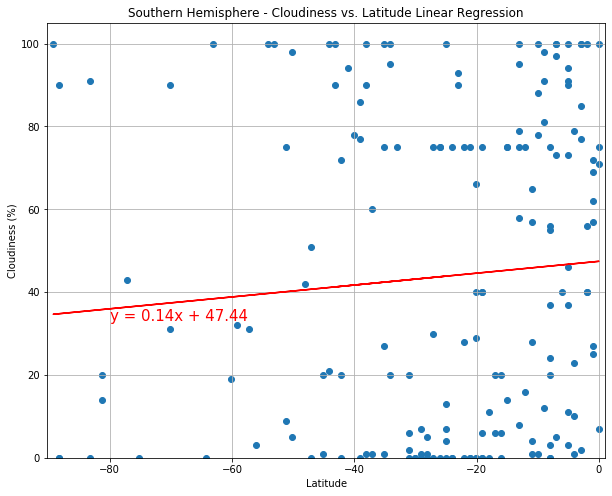

<Figure size 432x288 with 0 Axes>

In [28]:
# dataframe from scatter plot
LatCloud_ScatPlot_df
SouthHem_LatCloud_ScatPlot_df = LatCloud_ScatPlot_df[LatCloud_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Cloud = SouthHem_LatCloud_ScatPlot_df['Cloudiness']
Latitude = SouthHem_LatCloud_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Cloud)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Cloud)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Cloud)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,33), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim((SouthHem_LatCloud_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatCloud_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (SouthHem_LatCloud_ScatPlot_df['Cloudiness'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

### Observations from Cloudiness vs. Latitude (Northern and Southern Hemisphere)
 - There is no discernable trend with the data in the Northern or Southern hemisphere data . R-value of 0.01 for Northern Hemisphere and 0.00 for Southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.1671
The p-value is 0.001060641319664115
The r-value is: 0.0279


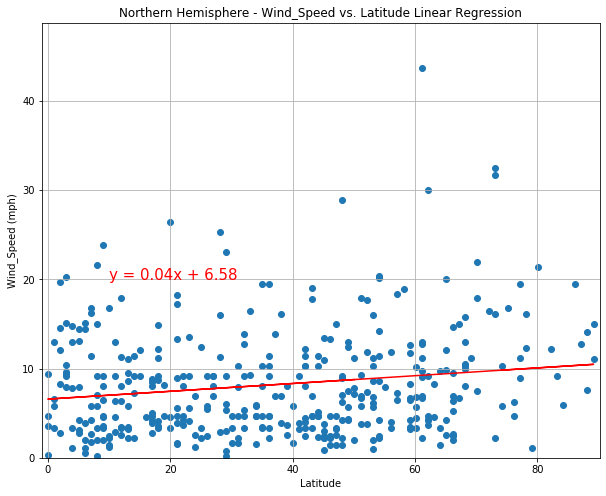

<Figure size 432x288 with 0 Axes>

In [29]:
# dataframe from scatter plot
LatWind_Speed_ScatPlot_df
NorthHem_LatWind_Speed_ScatPlot_df = LatWind_Speed_ScatPlot_df[LatWind_Speed_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Wind = NorthHem_LatWind_Speed_ScatPlot_df['Wind_Speed']
Latitude = NorthHem_LatWind_Speed_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Wind)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Wind)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Wind)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (10,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.xlim((NorthHem_LatWind_Speed_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatWind_Speed_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (NorthHem_LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_WindSpeed_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.3311
The p-value is 6.747459081688923e-06
The r-value is: 0.1096


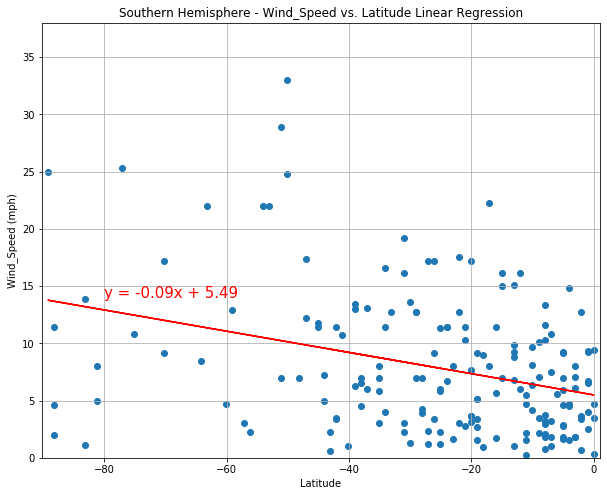

<Figure size 432x288 with 0 Axes>

In [30]:
# dataframe from scatter plot
LatWind_Speed_ScatPlot_df
SouthHem_LatWind_Speed_ScatPlot_df = LatWind_Speed_ScatPlot_df[LatWind_Speed_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Wind = SouthHem_LatWind_Speed_ScatPlot_df['Wind_Speed']
Latitude = SouthHem_LatWind_Speed_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Wind)

print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
print(f"The p-value is {(correlation[1])}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Wind)

# Calculate the predictions for each value of x
regression_values = Latitude * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Wind)

# Plot the regression line
plt.plot(Latitude, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,14), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.xlim((SouthHem_LatWind_Speed_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatWind_Speed_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (SouthHem_LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_WindSpeed_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

### Observations from Wind_Speed vs. Latitude (Northern and Southern Hemisphere)
 - There is a somewhat weak trend in both the Northern and southern hemisphere data. R-value of 0.03 and a correlation coefficient of 0.17 for Northern Hemisphere and R-value of 0.11 and a correlation coefficient of -0.33 for Southern hemisphere . So in this case, the wind speeds drop (slightly) as you get closer to the equator.

####  Saving csv file

In [31]:
clean_city_data_df.to_csv('clean_city_data.csv', index = False) 
summary_stats_df.to_csv('summary_stats.csv', index = False) 
clean_city_data_df.to_csv('../output_data/clean_city_data.csv', index = False) 
summary_stats_df.to_csv('../output_data/summary_stats.csv', index = False) 
